In [ ]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
missing_values = ['?', '--', ' ', 'NA', 'N/A', '-']
url='https://raw.githubusercontent.com/raj09523/cardio/main/new%20(5).csv'
df=pd.read_csv(url, delimiter=';', na_values=missing_values)
print('There are Total {} datapoints in the dataset with {} Features listed as {}:'.format(df.shape[0], df.shape[1], df.columns.values))
new = df.iloc[: , [1,2,3,4]].copy() 
new.head()

There are Total 63925 datapoints in the dataset with 5 Features listed as ['Unnamed: 0' 'sbp' 'dbp' 'cholesterol' 'pulse_pressure']:


,sbp,dbp,cholesterol,pulse_pressure
0,110,80,1,30.0
1,140,90,3,50.0
2,130,70,3,60.0
3,150,100,1,50.0
4,100,60,1,40.0


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os#Walking through directores

import plotly.graph_objects as go # Generate Graphs
from plotly.subplots import make_subplots #To Create Subplots

from sklearn import decomposition #pca
from sklearn.preprocessing import StandardScaler # Standardization ((X - X_mean)/X_std)

from sklearn.neighbors import KNeighborsClassifier #KNN Model
from sklearn.ensemble import RandomForestClassifier #RandomForest Model
from sklearn.linear_model import LogisticRegression #Logistic Model

from sklearn.model_selection import train_test_split # Splitting into train and test

from sklearn.model_selection import GridSearchCV# Hyperparameter Tuning
from sklearn.model_selection import cross_val_score#cross validation score

from sklearn.metrics import classification_report # text report showing the main classification metrics
from sklearn.metrics import confusion_matrix #to get confusion_matirx 
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
final = scaler.fit_transform(new)

DBSCAN


Estimated number of clusters: 12


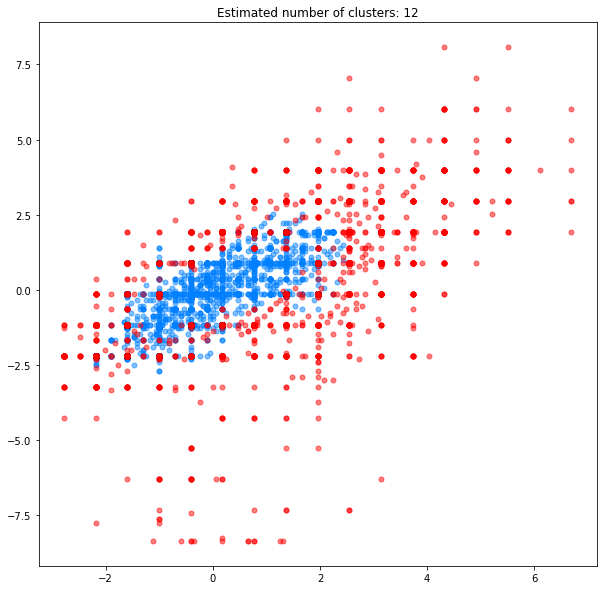

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs

db = DBSCAN(eps=0.5, min_samples=200).fit(final)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)

unique_labels = set(labels)
plt.figure(num=None, figsize=(10, 10), facecolor='w', edgecolor='k')
for k in unique_labels:
    col=[0,0.5,1,1]
    if k == -1:
        col = [1, 0, 0, 1]
    class_member_mask = (labels == k)

    xy = final[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', color=tuple(col),markersize=5, alpha=0.5)
    xy = final[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', color=tuple(col), markersize=5, alpha=0.5)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.metrics import silhouette_score
import seaborn as sns
import scipy.cluster.hierarchy as shc
import nbformat
import matplotlib.pyplot as plt
import sklearn.preprocessing as pp

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
final = scaler.fit_transform(new)
normalized_df=pp.normalize(final)
normalized_df=pd.DataFrame(normalized_df)
normalized_df.describe()


,0,1,2,3
count,63925.000000,63925.000000,63925.000000,63925.000000
mean,-0.099132,-0.036446,-0.165121,-0.110041
std,0.459285,0.456306,0.550072,0.477230
min,-0.666660,-0.892258,-0.985084,-0.841316
25%,-0.488464,-0.196514,-0.652433,-0.556219
50%,-0.294680,-0.162340,-0.324322,-0.276495
75%,0.307588,0.334912,0.259022,0.269501
max,0.673068,0.900462,0.999164,0.849881


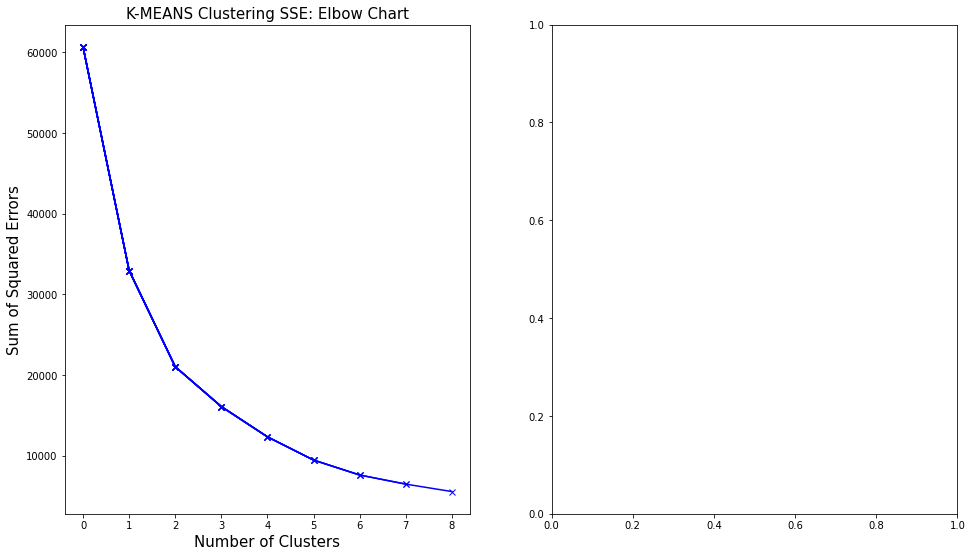

In [ ]:
figure = plt.figure(figsize=(16, 9))
elbow = figure.add_subplot(1,2,1) #elbow chart
kmean_sil = figure.add_subplot(1,2,2) #silhouette bar chart

n_clusters=10
cost=[]
for i in range(1,n_clusters):
    kmean= KMeans(i)
    kmean.fit(normalized_df)
    cost.append(kmean.inertia_) 
    elbow.set_ylabel('Sum of Squared Errors', fontsize = 15)
    elbow.set_xlabel('Number of Clusters', fontsize = 15)
    elbow.set_title('K-MEANS Clustering SSE: Elbow Chart', fontsize = 15)
    elbow.plot(cost, 'bx-')

Text(0, 0.5, 'Silhouette Score')

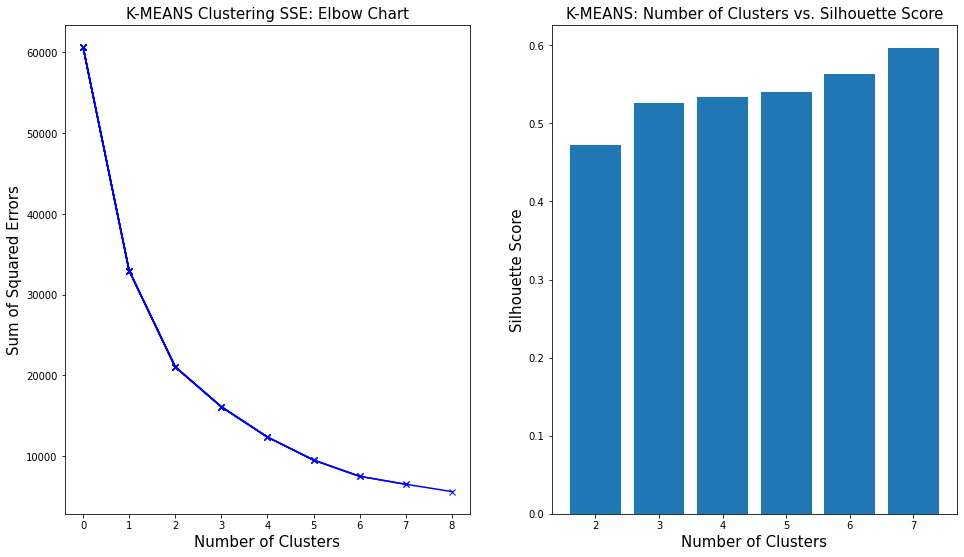

In [ ]:

silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(normalized_df, KMeans(n_clusters = n_cluster).fit_predict(normalized_df))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
kmean_sil.bar(k, silhouette_scores) 
kmean_sil.set_title('K-MEANS: Number of Clusters vs. Silhouette Score', fontsize = 15)
kmean_sil.set_xlabel('Number of Clusters', fontsize = 15) 
kmean_sil.set_ylabel('Silhouette Score', fontsize = 15) 

In [ ]:
kmean= KMeans(2)
kmean.fit(normalized_df)
labels=kmean.labels_
clusters=pd.concat([new, pd.DataFrame({'cluster':labels})], axis=1)

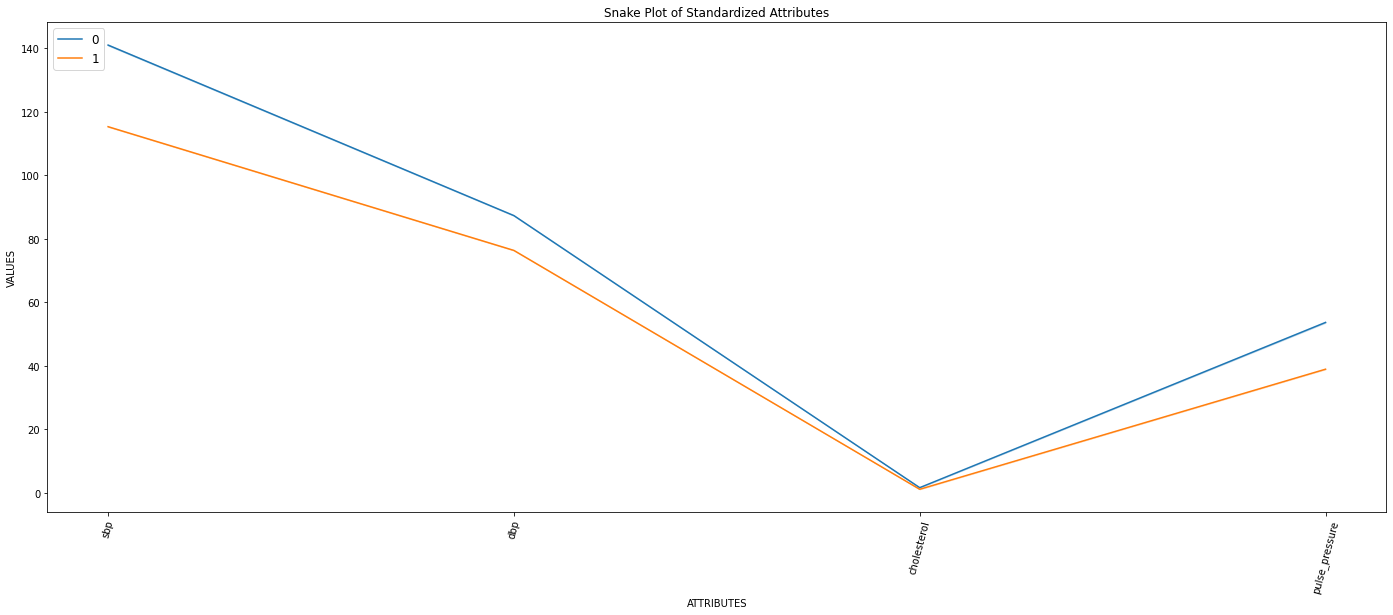

In [ ]:
datamart_melt = pd.melt(clusters.reset_index(),
id_vars=['cluster'],
value_vars=['sbp', 'dbp','cholesterol','pulse_pressure'],
var_name='ATTRIBUTES',
value_name='VALUES')

plt.figure(figsize=(24, 9))
chart = sns.lineplot(x="ATTRIBUTES", y="VALUES", hue='cluster', data=datamart_melt)
plt.title('Snake Plot of Standardized Attributes')
plt.xticks(rotation=75)
plt.legend(loc='upper left', fontsize='large')

figure.tight_layout()


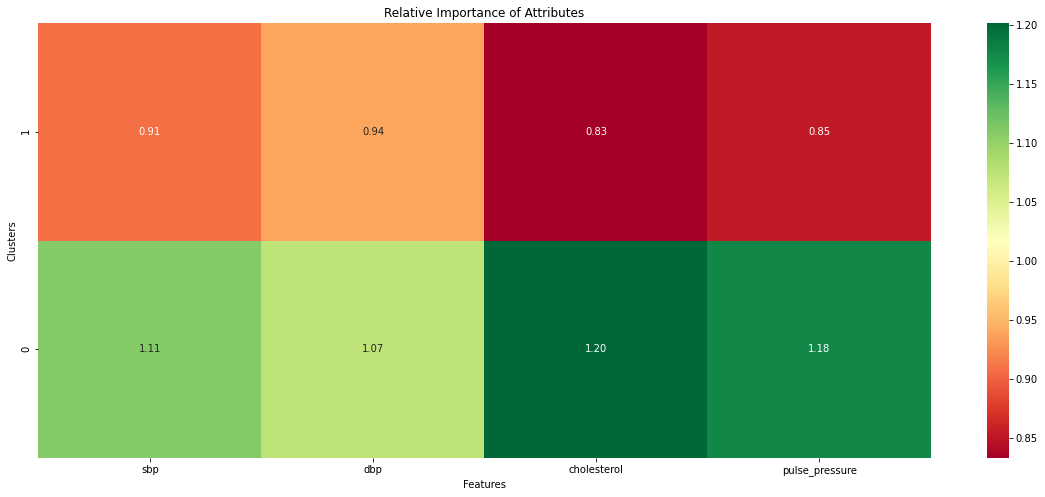

In [ ]:
cluster_avg = clusters.groupby(['cluster']).mean()
population_avg = clusters.mean()
population_avg = population_avg.drop('cluster')
relative_imp = cluster_avg/population_avg
relative_imp.sort_values(by=['cluster'],inplace=True)
relative_imp.round(2).unstack()

plt.figure(figsize=(20, 8))
plt.title('Relative Importance of Attributes')
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn', yticklabels='auto')
plt.ylim(0,2)
plt.xlabel('Features')
plt.ylabel('Clusters')
figure.tight_layout()
plt.savefig('kmeans_heat.png')
plt.show()

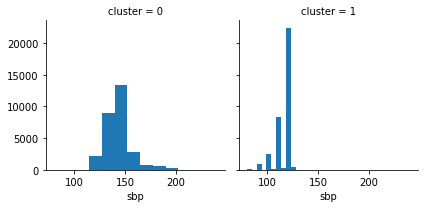

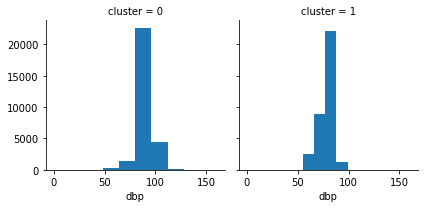

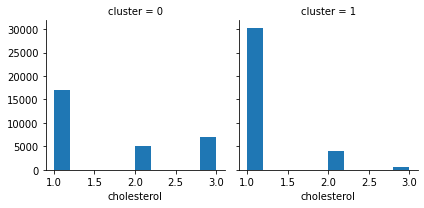

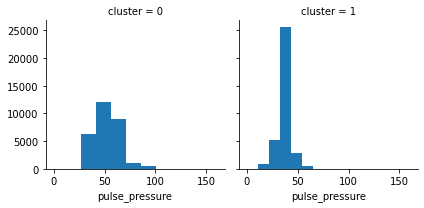

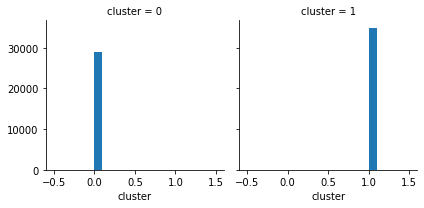

In [ ]:
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)    
    plt.show()

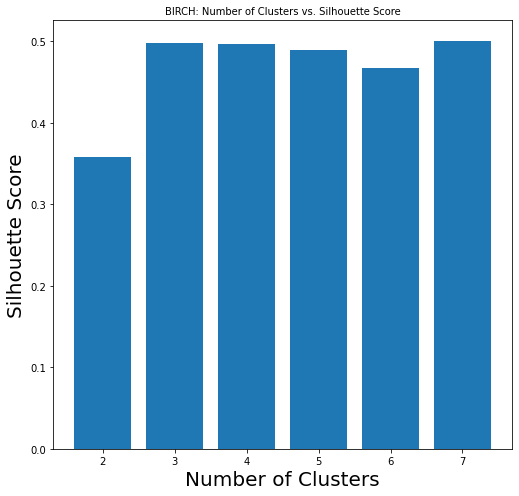

In [ ]:
figure = plt.figure(figsize=(21, 7))
#kmean_sil = figure.add_subplot(1,3,1) #kmean silhouette bar chart
birch_sil = figure.add_subplot(1,3,2) #birch chart

birch_silhouette_scores = [] 

for n_cluster in range(2, 8):
    
    
    birch_silhouette_scores.append( 
        silhouette_score(normalized_df, Birch(n_clusters = n_cluster).fit_predict(normalized_df))) 
    
birch_sil.bar(k, birch_silhouette_scores) 
birch_sil.set_title('BIRCH: Number of Clusters vs. Silhouette Score', fontsize = 10)
birch_sil.set_xlabel('Number of Clusters', fontsize = 20) 
birch_sil.set_ylabel('Silhouette Score', fontsize = 20) 
  


figure.tight_layout()

In [ ]:
birch_cluster= Birch(n_clusters=2)
birch_cluster.fit(normalized_df)
labels=birch_cluster.labels_

birch_clusters=pd.concat([new, pd.DataFrame({'cluster':labels})], axis=1)
birch_clusters.head()

,sbp,dbp,cholesterol,pulse_pressure,cluster
0,110,80,1,30.0,0
1,140,90,3,50.0,1
2,130,70,3,60.0,1
3,150,100,1,50.0,0
4,100,60,1,40.0,0


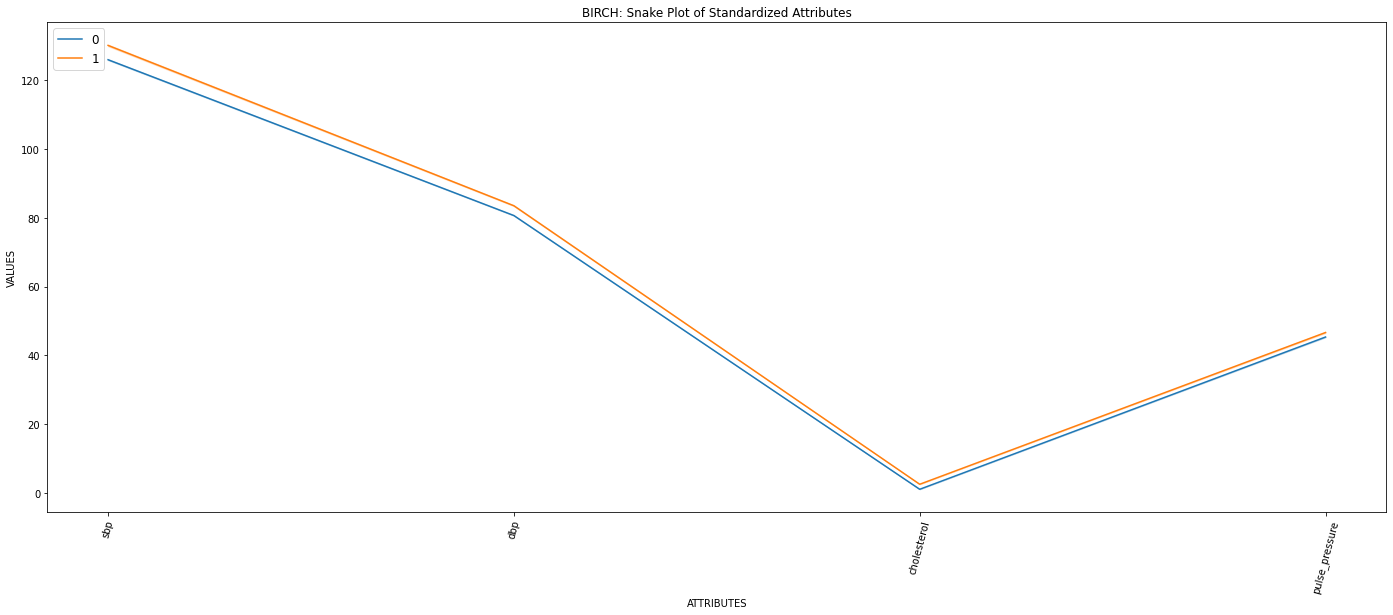

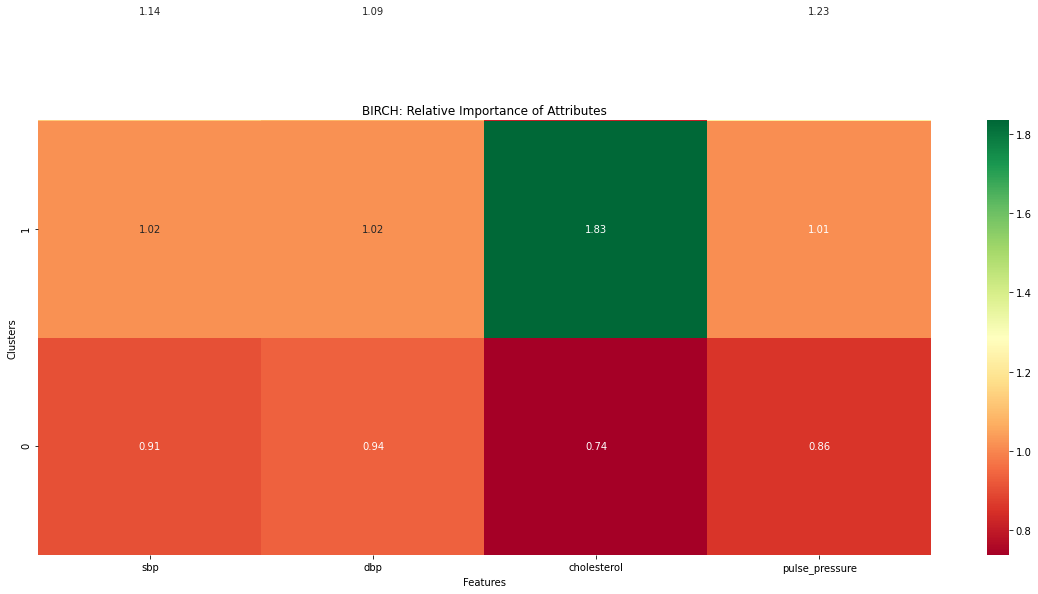

In [ ]:
datamart_melt = pd.melt(birch_clusters.reset_index(),
id_vars=['cluster'],
value_vars=['sbp','dbp','cholesterol','pulse_pressure'],
var_name='ATTRIBUTES',
value_name='VALUES')

#snakeplot
plt.figure(figsize=(24, 9))
chart = sns.lineplot(x="ATTRIBUTES", y="VALUES", hue='cluster', data=datamart_melt)
plt.title('BIRCH: Snake Plot of Standardized Attributes')
plt.xticks(rotation=75)
plt.legend(loc='upper left', fontsize='large')

figure.tight_layout()

## Relative Importance Heatmap
plt.figure(figsize=(20, 8))
plt.title('BIRCH: Relative Importance of Attributes')
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn', yticklabels='auto')
plt.ylim(0,2)
plt.xlabel('Features')
plt.ylabel('Clusters')
figure.tight_layout()
plt.savefig('kmeans_heat.png')
plt.show()


In [ ]:
figure = plt.figure(figsize=(21, 7))
agg_sil = figure.add_subplot(1,3,3) #AgglomerativeClustering chart

agg_silhouette_scores = [] 

for n_cluster in range(2, 8):
    agg_silhouette_scores.append( 
        silhouette_score(normalized_df, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(normalized_df))) 
    


agg_sil.bar(k, agg_silhouette_scores) 
agg_sil.set_title('Agglomerative: Number of Clusters vs. Silhouette Score', fontsize = 10)
agg_sil.set_xlabel('Number of Clusters', fontsize = 20) 
agg_sil.set_ylabel('Silhouette Score', fontsize = 20)
  


figure.tight_layout()

In [ ]:
agg_cluster= AgglomerativeClustering(n_clusters=2)
agg_cluster.fit(normalized_df)
agg_clusters=pd.concat([new, pd.DataFrame({'cluster':labels})], axis=1)

In [ ]:
datamart_melt = pd.melt(agg_clusters.reset_index(),
id_vars=['cluster'],
value_vars=['sbp','dbp','cholesterol','pulse_pressure'],
var_name='ATTRIBUTES',
value_name='VALUES')

plt.figure(figsize=(24, 9))
chart = sns.lineplot(x="ATTRIBUTES", y="VALUES", hue='cluster', data=datamart_melt)
plt.title('Agglomerative: Snake Plot of Standardized Attributes')
plt.xticks(rotation=75)
plt.legend(loc='upper left', fontsize='large')

figure.tight_layout()

# relative importance heatmap
plt.figure(figsize=(20, 8))
plt.title('Agglomerative: Relative Importance of Attributes')
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn', yticklabels='auto')
plt.ylim(0,2)
plt.xlabel('Features')
plt.ylabel('Clusters')
figure.tight_layout()
plt.savefig('Agglomerative_heat.png')
plt.show()
